# Titanic Dataset



In [1]:
%pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

raw_data=pd.read_excel("titanic3.xls", index_col=None)

In [3]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
raw_data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
print(raw_data.isnull)

<bound method DataFrame.isnull of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin em

## Corelation of features

In [21]:
correlated_data=raw_data.corr()
correlated_data.head()

/tmp/ipykernel_4420/2692780593.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_data=raw_data.corr()


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099


<AxesSubplot:>

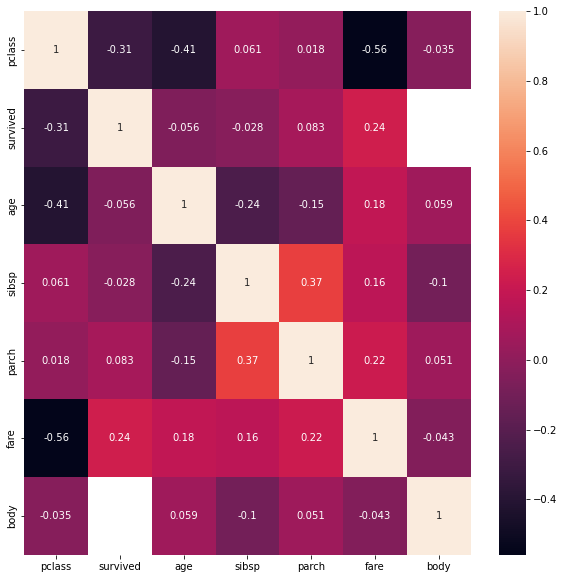

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlated_data, ax=ax, annot=True)

<AxesSubplot:>

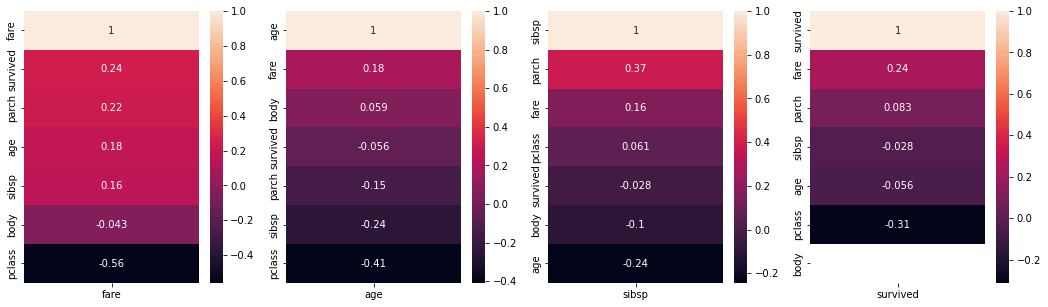

In [35]:
fig, ax = plt.subplots(1,4, figsize=(18, 5))

sns.heatmap(correlated_data[['fare']].sort_values(by='fare', ascending=False), ax=ax[0], annot=True)
sns.heatmap(correlated_data[['age']].sort_values(by='age', ascending=False), ax=ax[1], annot=True)
sns.heatmap(correlated_data[['sibsp']].sort_values(by='sibsp', ascending=False), ax=ax[2],annot=True)
sns.heatmap(correlated_data[['survived']].sort_values(by='survived', ascending=False), ax=ax[3],annot=True)

* **fare/pclass** are negatively correlated because higher fare means higher class (lower class value number hence negative)
* **fare/survived** correlation because higher fare means higher class which suggest that passengers are more likely to use lifeboat
* **sibsp/age** negative correlation because lower age means less possibility to have familiy members
* **sibsp/parch** siblings to parents/children correlation
* **age/pclass** negative correlation, higher age means lower class number value which means higher class
* **survived/pclass** more likely for passengers with higher class to survive
 

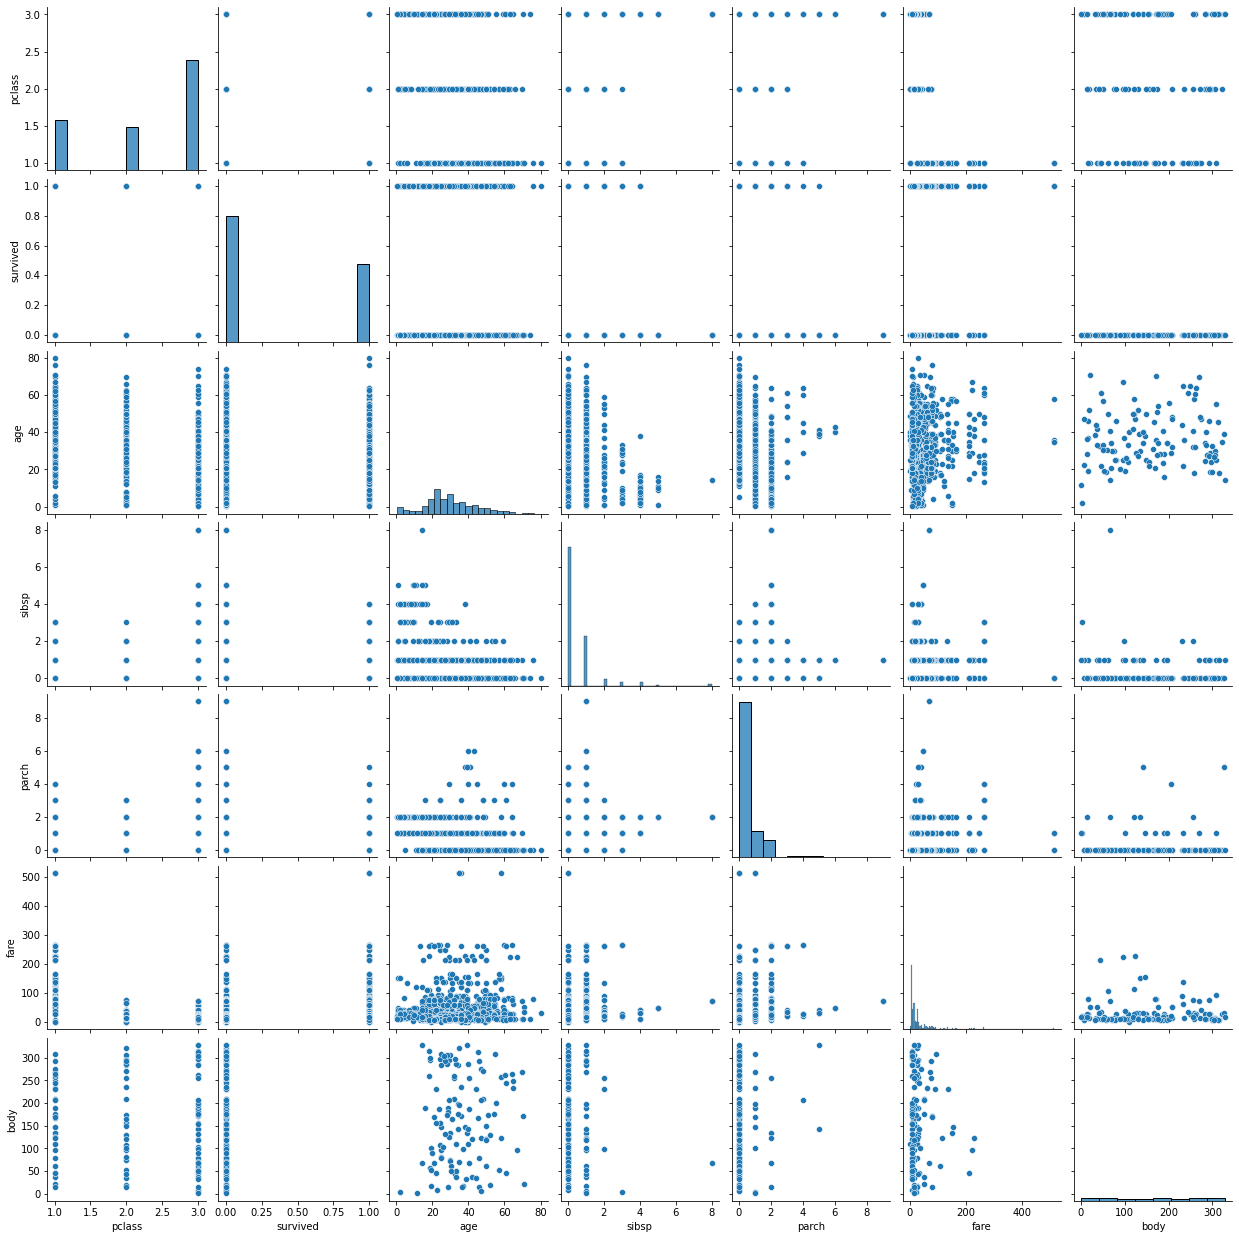

In [52]:
sns.pairplot(raw_data)

## Passenger distribution
What is sex/class distribution?

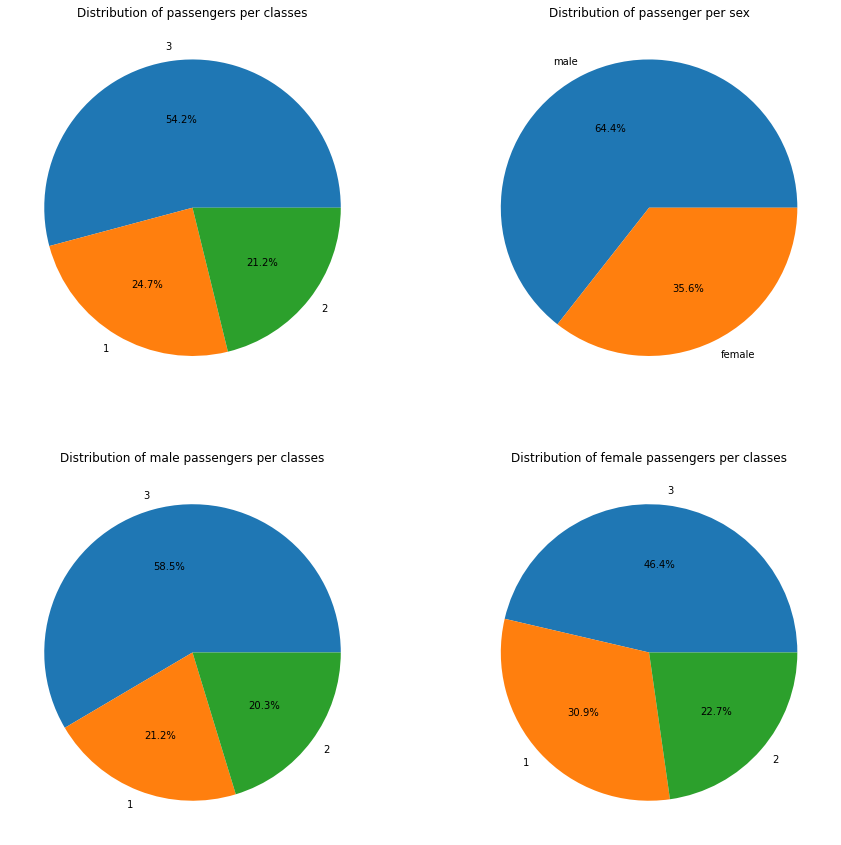

In [7]:
def plot_passenger_distribution(data, axs, title):
    axs.pie(data, labels=data.index, autopct='%1.1f%%')
    axs.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

plot_passenger_distribution(data=raw_data['pclass'].value_counts(),axs=axs[0,0],title='Distribution of passengers per classes')
plot_passenger_distribution(data=raw_data['sex'].value_counts(),axs=axs[0,1],title='Distribution of passenger per sex')
plot_passenger_distribution(data=raw_data[raw_data['sex'] == 'male']['pclass'].value_counts(),axs=axs[1,0],title='Distribution of male passengers per classes')
plot_passenger_distribution(data=raw_data[raw_data['sex'] == 'female']['pclass'].value_counts(),axs=axs[1,1],title='Distribution of female passengers per classes')

plt.show()

What is age/sex/class distribution?

Total number of passengers 1309


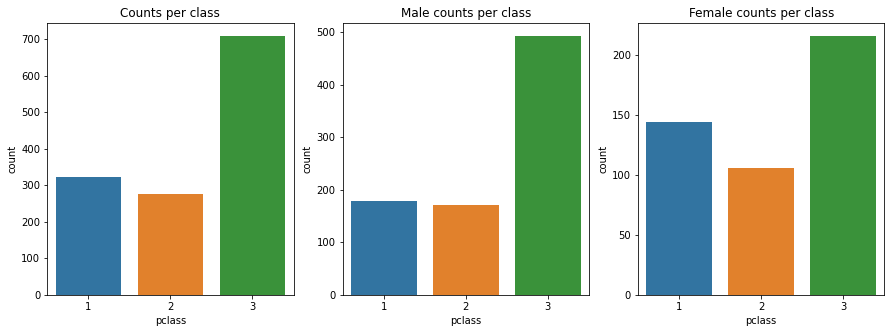

In [8]:
def subplot_class_counts(data,axs,title):
    sns.countplot(data=data, x='pclass', ax=axs)
    axs.set_title(title)

print("Total number of passengers %s" % len(raw_data))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

subplot_class_counts(data=raw_data, axs=axs[0], title='Counts per class')
subplot_class_counts(data=raw_data[raw_data['sex']=='male'], axs=axs[1], title='Male counts per class')
subplot_class_counts(data=raw_data[raw_data['sex']=='female'], axs=axs[2], title='Female counts per class')

plt.show()

In [36]:
sex_age_features = ['sex','age', 'pclass', 'survived']
sex_age_data= raw_data[sex_age_features].dropna()
sex_age_data.head()

,sex,age,pclass,survived
0,female,29.0000,1,1
1,male,0.9167,1,1
2,female,2.0000,1,0
3,male,30.0000,1,0
4,female,25.0000,1,0


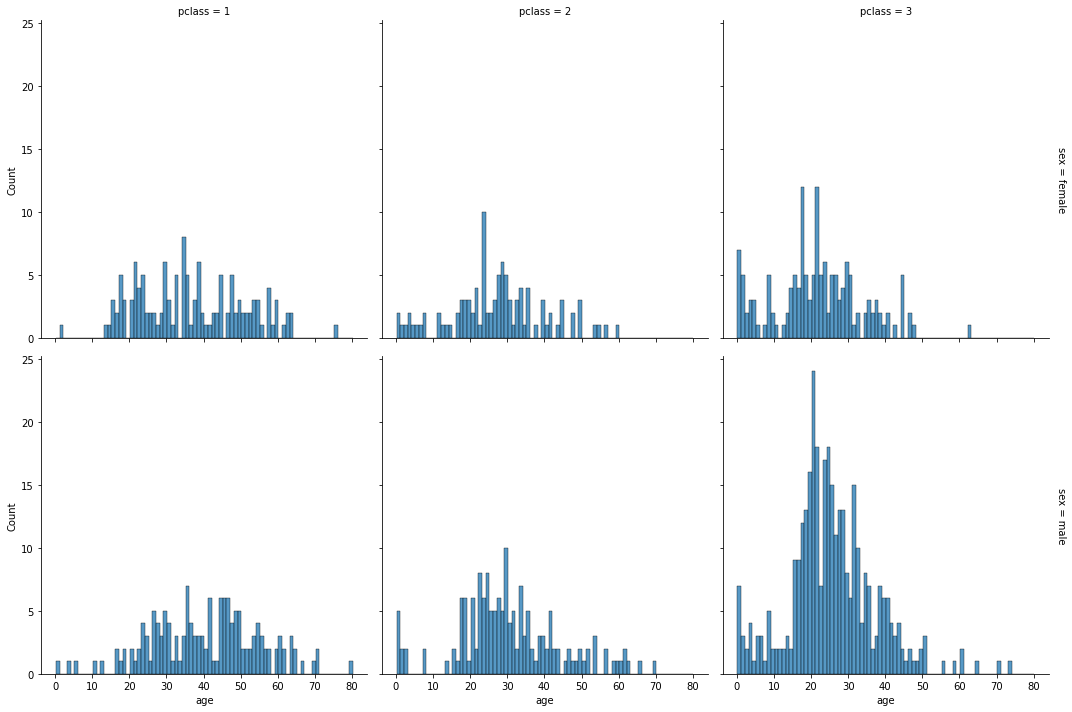

In [37]:
sns.displot(
    sex_age_data, x="age", col="pclass", row="sex",
    binwidth=1, height=5, facet_kws=dict(margin_titles=True)
)

Age distribution of female passengers is similar across all classes, with little increase in class 3. For male passengers we can see  that most passengers belonged to the class 3. There is similar distribution for classes 1 and 2.

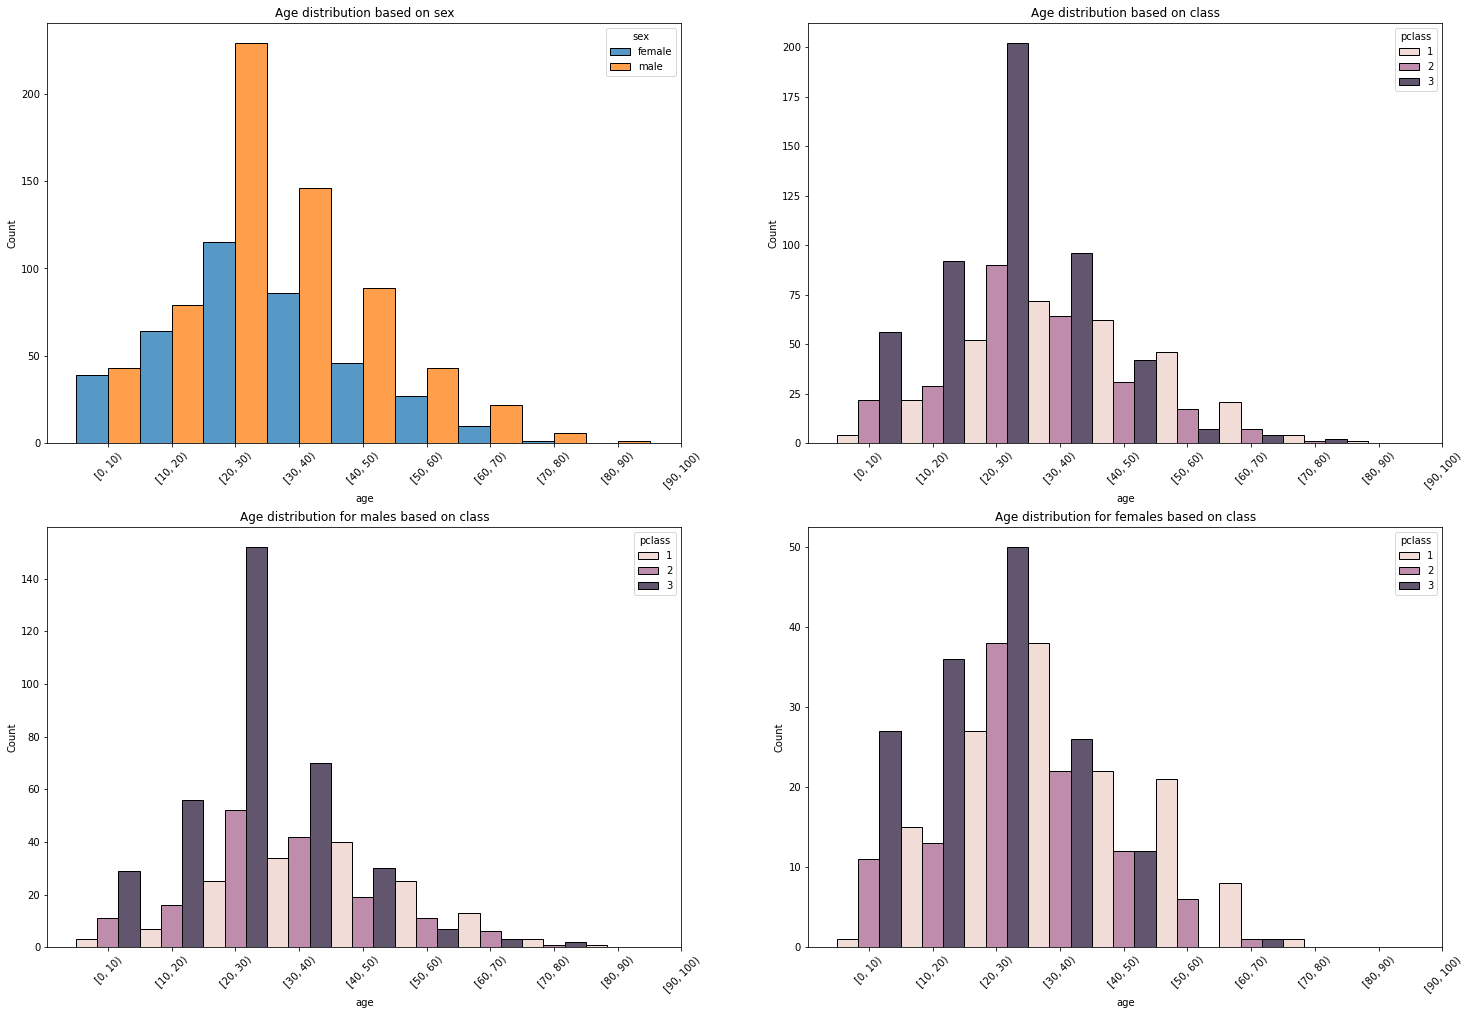

In [11]:
def plot_age_distr_subplot(data, axs, hue, title):
    age_range = range(0, 100, 10)
    bin_ranges = ["[{0}, {1})".format(i, i + 10) for i in age_range]

    sns.histplot(data=data, x='age', hue=hue, bins=age_range, legend=True, multiple='dodge', ax=axs)
    axs.set_title(title)
    axs.set_xticks(ticks=range(5, 105, 10), labels=bin_ranges, rotation=45)

fig, axs = plt.subplots(2, 2, figsize=(25, 17))

plot_age_distr_subplot(data=sex_age_data, axs=axs[0,0],hue='sex', title='Age distribution based on sex')
plot_age_distr_subplot(data=sex_age_data, axs=axs[0,1],hue='pclass', title='Age distribution based on class')
plot_age_distr_subplot(data=sex_age_data[sex_age_data['sex']=='male'], axs=axs[1,0],hue='pclass', title='Age distribution for males based on class')
plot_age_distr_subplot(data=sex_age_data[sex_age_data['sex']=='female'], axs=axs[1,1],hue='pclass', title='Age distribution for females based on class')

plt.show()

<Figure size 1080x360 with 0 Axes>

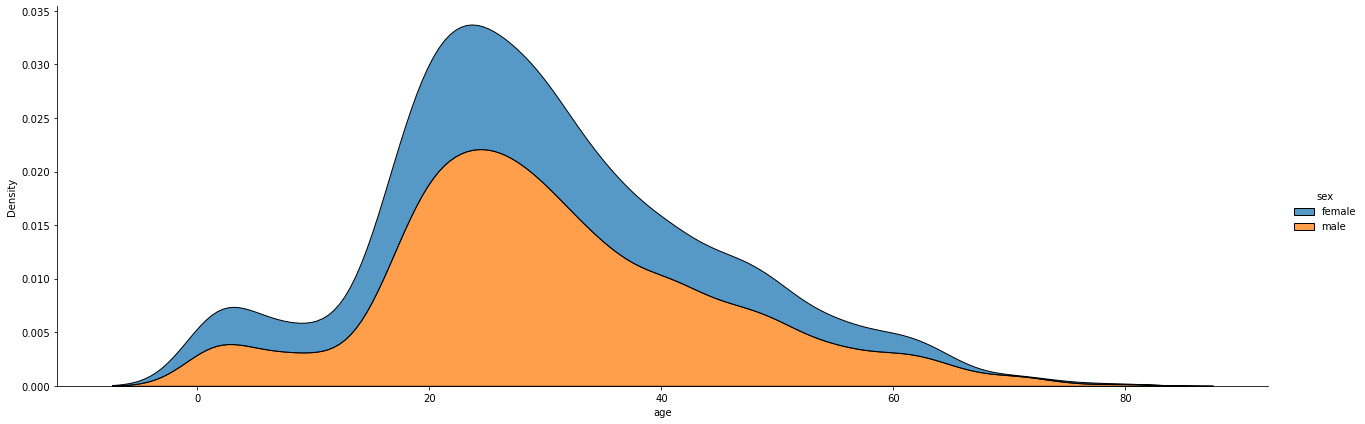

In [72]:
plt.figure(figsize=(15,5))

sns.displot(sex_age_data, x='age', kind="kde", hue="sex", multiple="stack", bw_adjust=.7, height=6, aspect=3)

Most traveling passengers were in their 20s-30s. There is also local maximum for children age 0-5

## Survival counts
What is the survival count by age/sex/class?

In [12]:
sex_age_survivors_features= ['survived','sex','age']
sex_age_survivors__data=raw_data[sex_age_survivors_features].dropna()

sex_age_survivors__data.head()

,survived,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,0,female,2.0000
3,0,male,30.0000
4,0,female,25.0000


In [13]:
sex_age_survivors__data

,survived,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,0,female,2.0000
3,0,male,30.0000
4,0,female,25.0000
...,...,...,...
1301,0,male,45.5000
1304,0,female,14.5000
1306,0,male,26.5000
1307,0,male,27.0000


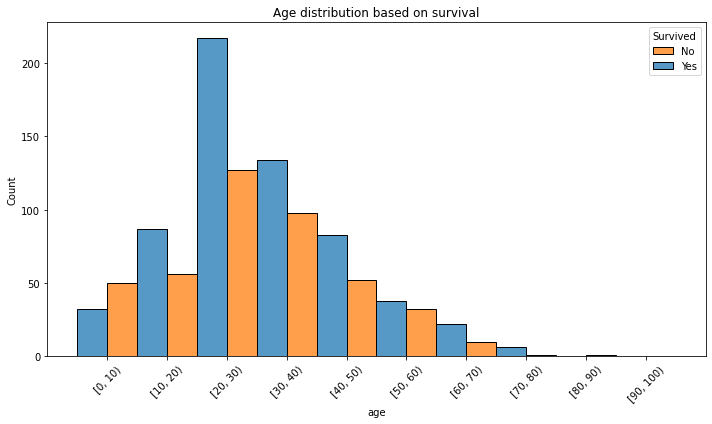

In [14]:
# Create the histogram
plt.figure(figsize=(10,6))
sns.histplot(data=sex_age_survivors__data, x='age', hue='survived', bins=range(0, 101, 10), legend=True, multiple='dodge')

# Adjust the x-ticks to show the desired ranges
bin_ranges = ["[{0}, {1})".format(i, i + 10) for i in range(0, 100, 10)]
plt.xticks(ticks=range(5, 105, 10), labels=bin_ranges, rotation=45)

plt.ylabel('Count')
plt.title('Age distribution based on survival')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

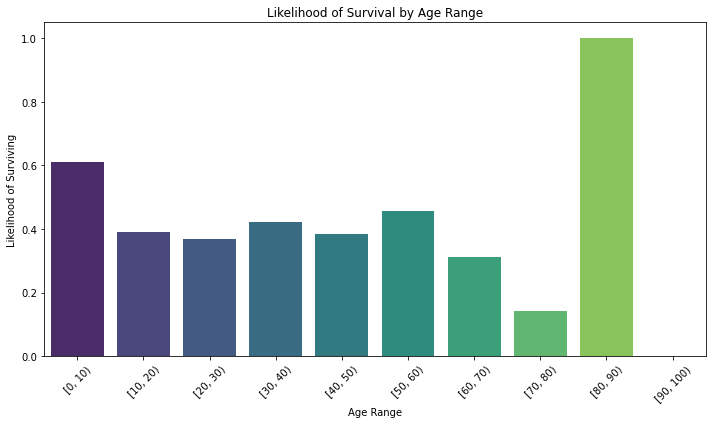

In [15]:
df = sex_age_survivors__data
# Bin the age data
bins = range(0, 101, 10)
df['age_bin'] = pd.cut(df['age'], bins=bins, right=False, labels=[f"[{i}, {i+10})" for i in bins[:-1]])

# Calculate the likelihood of surviving for each age bin
likelihood = df.groupby('age_bin')['survived'].mean()

# Plot the likelihood
plt.figure(figsize=(10,6))
sns.barplot(x=likelihood.index, y=likelihood.values, palette="viridis")
plt.ylabel('Likelihood of Surviving')
plt.xlabel('Age Range')
plt.title('Likelihood of Survival by Age Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()